# Статистический анализ с помощью Python &#x1F40D;

Цель этого блокнота: дать понимание различных статистических методов и концепций с помощью Python. 

![stats](photo_2024-07-09_18-58-32.jpg)

**Рассматриваемые темы включают**:

1. [Центральная предельная теорема (ЦПТ)](https://ru.wikipedia.org/wiki/%D0%A6%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0).
2. [Статистические тесты с помощью библиотеки SciPy](https://docs.scipy.org/doc/scipy/).
3. [Понимание p-value, корректности и мощности](https://ru.wikipedia.org/wiki/P-%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D0%B5).
4. [Перестановочные тесты](https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D0%BC%D1%83%D1%82%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D1%82%D0%B5%D1%81%D1%82).
5. [Методы бутстрапа](https://ru.wikipedia.org/wiki/%D0%91%D1%83%D1%82%D1%81%D1%82%D1%80%D1%8D%D0%BF_(%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0)).
6. [Бакетное сэмплирование](https://fastercapital.com/content/Optimizing-Data-Sampling-with-Bucket-Sampling.html#Examples-of-using-bucket-sampling-in-different-domains-and-scenarios:~:text=or%20seasonal%20variations.-,6.%20Examples%20of%20using%20bucket%20sampling%20in%20different%20domains%20and%20scenarios,-Bucket%20sampling%20is).

Каждый раздел включает в себя объяснения, примеры кода и визуализации для иллюстрации концепций.

Для дальнейшего чтения обратите внимание на следующие ресурсы:
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

## Импорт библиотеки с примерами &#x1F4DA;

Так как в рамках данного блокнота мы будем запускать код, необходимо импортировать библиотеки для работы со статистичечкими методами в Python.

Вдобавок давайте вместе взглянем на то, как ведут себя те или иные статистические функции.

In [1]:
# Импортируем необходимые библиотеки: numpy для работы с массивами, scipy для статистических функций,
# matplotlib для построения графиков и модуль scipy.stats для статистических тестов.

import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.stats

# Настраиваем Jupyter Notebook для отображения графиков прямо в блокноте.
%matplotlib inline

In [6]:
# Сгенерируем два набора данных с одинаковыми средними значениями, но разными стандартными отклонениями.
# data_fst - данные с нормальным распределением, среднее значение 10, стандартное отклонение 10, размер выборки 100.
# data_snd - данные с нормальным распределением, среднее значение 10, стандартное отклонение 1, размер выборки 100.

data_fst = np.random.normal(10, 10, size=100)
data_snd = np.random.normal(10, 1, size=100)

In [7]:
# Если мы посмотрим на средние значения выборок, то они, конечно же, будут различны.
# Выводим средние значения для каждого набора данных, чтобы увидеть различия.

print(data_fst.mean())
print(data_snd.mean())

10.601856162471856
9.879324246262545


In [12]:
# Но даже если средние значения немного различаются, они могут не сильно отличаться.
# Сгенерируем два набора данных с немного разными средними значениями.
# data_fst - данные с нормальным распределением, среднее значение 10.5, стандартное отклонение 10, размер выборки 100.
# data_snd - данные с нормальным распределением, среднее значение 10, стандартное отклонение 1, размер выборки 100.

data_fst = np.random.normal(10.5, 10, size=100)
data_snd = np.random.normal(10, 1, size=100)

In [15]:
# Выводим средние значения для каждого набора данных, чтобы увидеть различия.

print(data_fst.mean())
print(data_snd.mean())

9.4617089844891
10.050061991082707


### Что мы уже имеем?

Из приведённых примеров можно сделать несколько наблюдений:

1. **Средние значения выборок могут существенно отличаться в зависимости от стандартного отклонения данных.** В первом примере мы видели, что даже при одинаковых средних значениях выборки (10), большое стандартное отклонение (10) в первом наборе данных и малое стандартное отклонение (1) во втором наборе данных приводят к различным средним значениям выборок.
   
2. **Небольшие изменения в средних значениях исходных данных не всегда существенно влияют на средние значения выборок.** Во втором примере мы изменили среднее значение первого набора данных с 10 до 10.5, и, несмотря на это, средние значения выборок остались достаточно близкими друг к другу.

Эти наблюдения подчеркивают важность учета стандартного отклонения и других параметров распределения данных при проведении статистических анализов.

Мы уже видели, как стандартное отклонение и изменения в средних значениях выборок могут влиять на результаты. Эти наблюдения подводят нас к важному статистическому принципу - Центральной Предельной Теореме (**ЦПТ**).

**ЦПТ** является фундаментальной концепцией в статистике, которая помогает объяснить, почему средние значения выборок распределены определённым образом. Понимание **ЦПТ** позволяет нам использовать статистические методы, такие как доверительные интервалы и гипотезы, для анализа данных.


# Использование ЦПТ &#x270F;

### Можно воспользоваться ЦПТ и получить доверительный интервал для среднего

#### Определение ЦПТ:

**ВНИМАНИЕ! НЕМНОГО ФОРМУЛ!**

![math](Calculating-meme-meme-1j9mml.jpg)

Пусть $\xi_1, \xi_2, \dots$ - независимые одинаково распределённые случайные величины с конечной дисперсией $D \xi_1$ и мат. ожиданием $E \xi_1$, тогда

$\sqrt{\frac{n}{D \xi_1}} \left(\frac{\sum\limits_{i=1}^{n} \xi_i}{n} - E \xi_1\right) \to_{n \to \infty} \mathcal{N}(0, 1)$ 

Отсюда можно сделать вывод, что при больших $n$ величина $\frac{\sum\limits_{i=1}^{n} \xi_i}{n}$ будет распределена примерно как $\mathcal{N}(E \xi_1, \frac{D \xi_1}{n})$

Если бы мы знали $D \xi_1$, то отсюда можно получить интервал на $E \xi_1$:
$$
P\left(E \xi_1 \in \left[\frac{\sum\limits_{i=1}^{n} \xi_i}{n} - 1.96 \sqrt{\frac{D \xi_1}{n}}, \frac{\sum\limits_{i=1}^{n} \xi_i}{n} + 1.96 \sqrt{\frac{D \xi_1}{n}}\right]\right) \approx 0.95
$$

$D \xi_1$ можно оценить по выборке

Давайте объявим функцию `get_95_interval`, так как в будущем мы будем ещё не один раз её использовать.

In [19]:
def get_95_interval(data, sigma=None):
    mean = data.mean()
    if sigma is None:
        sigma = data.std()
    err = sigma * 1.96 / np.sqrt(len(data))
    return mean - err, mean + err

Следующим шагом проверим, что нужное нам значение **лежит в интервале с требуемой вероятностью**.

In [47]:
# Инициализируем переменные.
hits = 0.
count = 0.
true_mean = 10.

# Запускаем цикл для генерации 10000 выборок.
for _ in range(10000):
    # Генерируем выборку данных с нормальным распределением, среднее значение 10, стандартное отклонение 10, размер выборки 100.
    data = np.random.normal(true_mean, 10, size=100)
    
    # Вычисляем 95% доверительный интервал для средней величины выборки.
    lower_bound, upper_bound = get_95_interval(data)
    
    # Увеличиваем счетчик общего количества выборок.
    count += 1
    
    # Проверяем, попадает ли истинное среднее значение в доверительный интервал.
    if lower_bound <= true_mean <= upper_bound:
        # Если попадает, увеличиваем счетчик попаданий.
        hits += 1

# Выводим долю попаданий истинного среднего значения в доверительный интервал.
# Текст поясняет, что результат представляет собой долю случаев, когда истинное среднее значение попало в 95% доверительный интервал.
print(f"Доля случаев, когда истинное среднее значение попало в 95% доверительный интервал: {hits / count:.2f}")

Доля случаев, когда истинное среднее значение попало в 95% доверительный интервал: 0.94


Однако если **данных мало**, то оценка **неправильна** :(

In [57]:
# Инициализируем переменные.
hits = 0.
count = 0.
true_mean = 10.

# Запускаем цикл для генерации 10000 выборок.
for _ in range(10000):
    # Генерируем выборку данных с нормальным распределением, среднее значение 10, стандартное отклонение 10, размер выборки 10.
    data = np.random.normal(true_mean, 10, size=10)
    
    # Вычисляем 95% доверительный интервал для средней величины выборки.
    lower_bound, upper_bound = get_95_interval(data)
    
    # Увеличиваем счетчик общего количества выборок.
    count += 1
    
    # Проверяем, попадает ли истинное среднее значение в доверительный интервал.
    if lower_bound <= true_mean <= upper_bound:
        # Если попадает, увеличиваем счетчик попаданий.
        hits += 1

# Выводим долю попаданий истинного среднего значения в доверительный интервал.
# Текст поясняет, что результат представляет собой долю случаев, когда истинное среднее значение попало в 95% доверительный интервал.
print(f"Доля случаев, когда истинное среднее значение попало в 95% доверительный интервал: {hits / count:.2f}")


Доля случаев, когда истинное среднее значение попало в 95% доверительный интервал: 0.90


Подставим **реальное значение** дисперсии и **всё снова заработает**!

In [58]:
# Инициализируем переменные.
hits = 0.
count = 0.
true_mean = 10.

# Запускаем цикл для генерации 10000 выборок.
for _ in range(10000):
    # Генерируем выборку данных с нормальным распределением, среднее значение 10, стандартное отклонение 10, размер выборки 10.
    data = np.random.normal(true_mean, 10, size=10)
    
    # Вычисляем 95% доверительный интервал для средней величины выборки, используя заданное стандартное отклонение sigma=10.
    lower_bound, upper_bound = get_95_interval(data, sigma=10)
    
    # Увеличиваем счетчик общего количества выборок.
    count += 1
    
    # Проверяем, попадает ли истинное среднее значение в доверительный интервал.
    if lower_bound <= true_mean <= upper_bound:
        # Если попадает, увеличиваем счетчик попаданий.
        hits += 1

# Выводим долю попаданий истинного среднего значения в доверительный интервал.
# Текст поясняет, что результат представляет собой долю случаев, когда истинное среднее значение попало в 95% доверительный интервал.
print(f"Доля случаев, когда истинное среднее значение попало в 95% доверительный интервал: {hits / count:.2f}")

Доля случаев, когда истинное среднее значение попало в 95% доверительный интервал: 0.95


Итак, у нас две выборки с **гигантской** разницей в среднем!

In [51]:
# Генерируем два набора данных с различными средними значениями и стандартными отклонениями.

data_fst = np.random.normal(10.5, 10, size=100)
data_snd = np.random.normal(100, 1, size=100)

# Вычисляем и выводим 95% доверительный интервал для каждой выборки.

print(f"95% доверительный интервал для data_fst: {get_95_interval(data_fst)}")
print(f"95% доверительный интервал для data_snd: {get_95_interval(data_snd)}")

95% доверительный интервал для data_fst: (9.167894537945335, 13.079033982208047)
95% доверительный интервал для data_snd: (99.7562321638803, 100.14196528447474)


Конечно же интервалы **не пересекаются**!

Однако если разница **небольшая**, то интервалы **могут пересечься**.

In [59]:
# Генерируем два набора данных с различными средними значениями и стандартными отклонениями.

data_fst = np.random.normal(11, 10, size=500)
data_snd = np.random.normal(10, 1, size=100)

print(f"95% доверительный интервал для data_fst: {get_95_interval(data_fst)}")
print(f"95% доверительный интервал для data_snd: {get_95_interval(data_snd)}")

95% доверительный интервал для data_fst: (10.50231419086485, 12.292241978941503)
95% доверительный интервал для data_snd: (9.86615829035751, 10.260190263966722)


Теперь давайте посмотрим, как часто такой критерий (доверительные интервалы не пересекаются) будет находить различие в случае, если оно **действительно существует**. В некотором смысле это показатель мощности критерия.

In [60]:
# Инициализируем переменные.
hits = 0.
count = 0.

# Запускаем цикл для генерации 10000 пар выборок.
for _ in range(10000):
    # Генерируем первый набор данных с нормальным распределением, среднее значение 11, стандартное отклонение 10, размер выборки 1000.
    data_fst = np.random.normal(11, 10, size=1000)
    
    # Генерируем второй набор данных с нормальным распределением, среднее значение 10, стандартное отклонение 1, размер выборки 100.
    data_snd = np.random.normal(10, 1, size=100)
    
    # Вычисляем 95% доверительные интервалы для каждой выборки.
    lower_fst, upper_fst = get_95_interval(data_fst)
    lower_snd, upper_snd = get_95_interval(data_snd)
    
    # Увеличиваем счетчик общего количества выборок.
    count += 1
    
    # Проверяем, пересекаются ли доверительные интервалы.
    # Если интервалы не пересекаются, увеличиваем счетчик hits.
    if not (lower_fst <= lower_snd <= upper_fst or lower_fst <= upper_snd <= upper_fst):
        hits += 1

# Выводим долю случаев, когда доверительные интервалы не пересекались.
# Текст поясняет, что результат представляет собой долю случаев, когда критерий нашел различие между выборками.
print(f"Доля случаев, когда доверительные интервалы не пересекались (критерий нашел различие): {hits / count:.2f}")


Доля случаев, когда доверительные интервалы не пересекались (критерий нашел различие): 0.71


Также проверим, как часто **различие** будет обнаруживаться, если его **нет**.

In [61]:
# Инициализируем переменные.
hits = 0.
count = 0.

# Запускаем цикл для генерации 10000 пар выборок.
for _ in range(10000):
    # Генерируем первый набор данных с нормальным распределением, среднее значение 10, стандартное отклонение 10, размер выборки 1000.
    data_fst = np.random.normal(10, 10, size=1000)
    
    # Генерируем второй набор данных с нормальным распределением, среднее значение 10, стандартное отклонение 1, размер выборки 100.
    data_snd = np.random.normal(10, 1, size=100)
    
    # Вычисляем 95% доверительные интервалы для каждой выборки.
    lower_fst, upper_fst = get_95_interval(data_fst)
    lower_snd, upper_snd = get_95_interval(data_snd)
    
    # Увеличиваем счетчик общего количества выборок.
    count += 1
    
    # Проверяем, пересекаются ли доверительные интервалы.
    # Если интервалы не пересекаются, увеличиваем счетчик hits.
    if not (lower_fst <= lower_snd <= upper_fst or lower_fst <= upper_snd <= upper_fst):
        hits += 1

# Выводим долю случаев, когда доверительные интервалы не пересекались.
# Текст поясняет, что результат представляет собой долю случаев, когда критерий нашел различие между выборками.
print(f"Доля случаев, когда доверительные интервалы не пересекались (критерий нашел различие): {hits / count:.2f}")

Доля случаев, когда доверительные интервалы не пересекались (критерий нашел различие): 0.01


Также проверим, как часто различие будет обнаруживаться, если оно есть, но **очень маленькое**.

In [62]:
# Инициализируем переменные.
hits = 0.
count = 0.

# Запускаем цикл для генерации 10000 пар выборок.
for _ in range(10000):
    # Генерируем первый набор данных с нормальным распределением, среднее значение 10.1, стандартное отклонение 10, размер выборки 1000.
    data_fst = np.random.normal(10.1, 10, size=1000)
    
    # Генерируем второй набор данных с нормальным распределением, среднее значение 10, стандартное отклонение 1, размер выборки 100.
    data_snd = np.random.normal(10, 1, size=100)
    
    # Вычисляем 95% доверительные интервалы для каждой выборки.
    lower_fst, upper_fst = get_95_interval(data_fst)
    lower_snd, upper_snd = get_95_interval(data_snd)
    
    # Увеличиваем счетчик общего количества выборок.
    count += 1
    
    # Проверяем, пересекаются ли доверительные интервалы.
    # Если интервалы не пересекаются, увеличиваем счетчик hits.
    if not (lower_fst <= lower_snd <= upper_fst or lower_fst <= upper_snd <= upper_fst):
        hits += 1

# Выводим долю случаев, когда доверительные интервалы не пересекались.
# Текст поясняет, что результат представляет собой долю случаев, когда критерий нашел различие между выборками.
print(f"Доля случаев, когда доверительные интервалы не пересекались (критерий нашел различие): {hits / count:.2f}")


Доля случаев, когда доверительные интервалы не пересекались (критерий нашел различие): 0.02


**Немножко формул! Но я уверен, Вам они уже не страшны!**

В простом варианте давайте вычтем две незавимых случайных величины друг из друга

$\mathcal{N}(a_1, \sigma_1^2) - \mathcal{N}(a_2, \sigma_2^2) \sim \mathcal{N}(a_1 - a_2, \sigma_1^2 + \sigma_2^2)$ 

То есть в нашем случае $\frac{\sum\limits_{i=1}^{n^1} \xi_i^1}{n^1} - \frac{\sum\limits_{i=1}^{n^2} \xi_i^2}{n^2}$ будет распределена примерно как $\mathcal{N}(E \xi_1^1 - E \xi_1^2, \frac{D \xi_1^1}{n^1} + \frac{D \xi_1^2}{n^2})$

Проверим те же параметры, что и в предыдущем случае.

Опять же варьируем только средние значения наших выборок.

In [66]:
# Инициализируем переменные.
hits = 0.
count = 0.

# Запускаем цикл для генерации 10000 пар выборок.
for _ in range(10000):
    # Генерируем первый набор данных с нормальным распределением, среднее значение 11, стандартное отклонение 10, размер выборки 1000.
    data_fst = np.random.normal(11, 10, size=1000)
    
    # Генерируем второй набор данных с нормальным распределением, среднее значение 10, стандартное отклонение 1, размер выборки 100.
    data_snd = np.random.normal(10, 1, size=100)
    
    # Вычисляем тестовую статистику для сравнения средних значений двух выборок.
    stat = (
        (data_fst.mean() - data_snd.mean()) 
        / 
        np.sqrt(1. * data_fst.std() ** 2 / len(data_fst) + 1. * data_snd.std() ** 2 / len(data_snd))
    )

    # Увеличиваем счетчик общего количества выборок.
    count += 1
    
    # Проверяем, превышает ли абсолютное значение статистики критическое значение 1.96.
    # Если превышает, увеличиваем счетчик hits.
    if abs(stat) > 1.96:
        hits += 1

# Выводим долю случаев, когда тестовая статистика показала значимость различий.
# Текст поясняет, что результат представляет собой долю случаев, когда критерий нашел значимые различия между выборками.
print(f"Доля случаев, когда тестовая статистика показала значимость различий: {hits / count:.2f}")

Доля случаев, когда тестовая статистика показала значимость различий: 0.85


In [67]:
# Инициализируем переменные.
hits = 0.
count = 0.

# Запускаем цикл для генерации 10000 пар выборок.
for _ in range(10000):
    # Генерируем первый набор данных с нормальным распределением, среднее значение 10, стандартное отклонение 10, размер выборки 1000.
    data_fst = np.random.normal(10, 10, size=1000)
    
    # Генерируем второй набор данных с нормальным распределением, среднее значение 10, стандартное отклонение 1, размер выборки 100.
    data_snd = np.random.normal(10, 1, size=100)
    
    # Вычисляем тестовую статистику для сравнения средних значений двух выборок.
    stat = (
        (data_fst.mean() - data_snd.mean()) 
        / 
        np.sqrt(1. * data_fst.std() ** 2 / len(data_fst) + 1. * data_snd.std() ** 2 / len(data_snd))
    )

    # Увеличиваем счетчик общего количества выборок.
    count += 1
    
    # Проверяем, превышает ли абсолютное значение статистики критическое значение 1.96.
    # Если превышает, увеличиваем счетчик hits.
    if abs(stat) > 1.96:
        hits += 1

# Выводим долю случаев, когда тестовая статистика показала значимость различий.
# Текст поясняет, что результат представляет собой долю случаев, когда критерий нашел значимые различия между выборками.
print(f"Доля случаев, когда тестовая статистика показала значимость различий: {hits / count:.2f}")

Доля случаев, когда тестовая статистика показала значимость различий: 0.05


In [68]:
# Инициализируем переменные.
hits = 0.
count = 0.

# Запускаем цикл для генерации 10000 пар выборок.
for _ in range(10000):
    # Генерируем первый набор данных с нормальным распределением, среднее значение 10.1, стандартное отклонение 10, размер выборки 1000.
    data_fst = np.random.normal(10.1, 10, size=1000)
    
    # Генерируем второй набор данных с нормальным распределением, среднее значение 10, стандартное отклонение 1, размер выборки 100.
    data_snd = np.random.normal(10, 1, size=100)
    
    # Вычисляем тестовую статистику для сравнения средних значений двух выборок.
    stat = (
        (data_fst.mean() - data_snd.mean()) 
        / 
        np.sqrt(1. * data_fst.std() ** 2 / len(data_fst) + 1. * data_snd.std() ** 2 / len(data_snd))
    )

    # Увеличиваем счетчик общего количества выборок.
    count += 1
    
    # Проверяем, превышает ли абсолютное значение статистики критическое значение 1.96.
    # Если превышает, увеличиваем счетчик hits.
    if abs(stat) > 1.96:
        hits += 1

# Выводим долю случаев, когда тестовая статистика показала значимость различий.
# Текст поясняет, что результат представляет собой долю случаев, когда критерий нашел значимые различия между выборками.
print(f"Доля случаев, когда тестовая статистика показала значимость различий: {hits / count:.2f}")

Доля случаев, когда тестовая статистика показала значимость различий: 0.06


Это уже более похоже на то, чего нам бы хотелось!

# Статистические тесты с помощью библиотеки SciPy 👨‍💻

Ранее мы вручную рассчитывали статистику теста для выявления различий между выборками. Однако, каждый раз писать такие критерии было бы чересчур утомительно, особенно учитывая, что в модуле `scipy` уже есть готовые функции для различных статистических тестов. Это позволяет существенно упростить и ускорить процесс анализа данных.

Библиотека `scipy` предоставляет широкий набор статистических тестов, в которых уже реализованы все необходимые формулы. Вам нужно лишь вызвать соответствующую функцию и передать ей данные. Это делает анализ данных не только более эффективным, но и уменьшает вероятность ошибок, связанных с ручным вычислением.

Давайте рассмотрим примеры использования `scipy` для выполнения статистических тестов.

## О смысле p-value, корректности и мощности

Одним из важных результатов статистических тестов является **p-value**. **p-value** (уровень значимости) помогает определить, насколько сильны доказательства против нулевой гипотезы. Малое значение p-value (обычно меньше 0.05) указывает на то, что различия между выборками значимы и маловероятны при условии истинности нулевой гипотезы.

Каким образом мы можем получить наш уровень значимости из готовых библиотек?

In [77]:
print(f"p-value нашего теста: {scipy.stats.ttest_ind(data_fst, data_snd).pvalue}")

p-value нашего теста: 0.0371495019515154


## Почему нам нужно понимать, какой p-value мы имеем? 🤔

**p-value** является важным показателем, который позволяет нам сделать выводы о значимости различий между выборками. Вот несколько причин, почему расчёт p-value важно:

* **Оценка значимости**: p-value позволяет оценить, являются ли наблюдаемые различия статистически значимыми. Это помогает понять, можно ли отвергнуть нулевую гипотезу.
* **Простота интерпретации**: p-value предоставляет простой и понятный способ интерпретации результатов теста. Малое значение p-value указывает на значительные различия, в то время как большое значение p-value указывает на отсутствие значительных различий.
* **Принятие решений**: Вытягивание p-value помогает в принятии обоснованных решений на основе статистических данных. Это важно в научных исследованиях, бизнес-аналитике и других областях.

Давайте рассмотрим гистограмму распределения p-value, чтобы увидеть, как часто t-тест Стьюдента находит значимые различия между выборками. Мы будем использовать функцию `scipy.stats.ttest_ind`, которая будет хранить соответсвующий атрибут `pvalue`. 

В идеальном случае, если нулевая гипотеза верна (т.е. выборки взяты из одного и того же распределения), p-value должны быть равномерно распределены между 0 и 1. Если выборки действительно различаются, гистограмма может показать смещение в сторону меньших значений p-value, что указывает на более частое нахождение значимых различий.

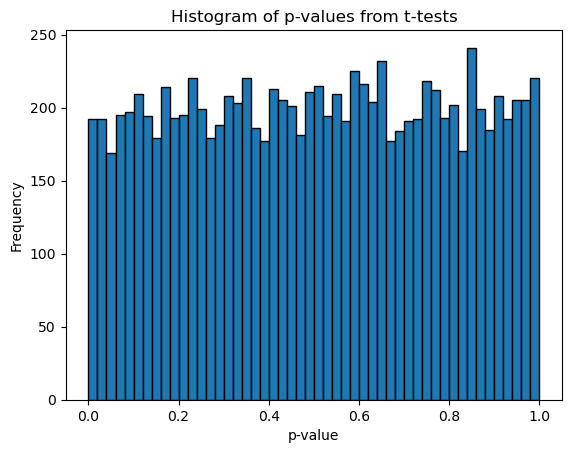

In [95]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Создаем список для хранения p-value
pvalues = []

# Запускаем цикл для генерации 10000 пар выборок и вычисления p-value
for _ in range(10000):
    # Генерируем первый набор данных с нормальным распределением, среднее значение 10, стандартное отклонение 10, размер выборки 100.
    data_fst = np.random.normal(10, 10, size=100)
    
    # Генерируем второй набор данных с нормальным распределением, среднее значение 10, стандартное отклонение 1, размер выборки 100.
    data_snd = np.random.normal(10, 1, size=100)
    
    # Применяем t-тест Стьюдента для независимых выборок и сохраняем p-value
    pvalues.append(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)
    
# Функция для форматирования чисел с разделением тысячных пробелами
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x).replace(',', ' ')

# Строим гистограмму распределения p-value
plt.hist(pvalues, bins=50, edgecolor='k')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.title('Histogram of p-values from t-tests')

# Применяем форматирование оси Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.show()

### Что мы видим? 🤓

Равномерное распределение p-value на гистограмме свидетельствует о том, что в большинстве случаев t-тест Стьюдента не находит значимых различий между выборками. Это соответствует ситуации, когда выборки имеют одинаковое среднее значение и различие между ними является незначительным.

Теперь давайте рассмотрим, как часто t-тест Стьюдента находит значимые различия между выборками, которые на самом деле не различаются (ошибка первого рода).

In [96]:
import numpy as np
import scipy.stats

# Создаем список для хранения результатов проверки p-value < 0.05
bad_pvalues = []

# Запускаем цикл для генерации 10000 пар выборок и проверки p-value
for _ in range(10000):
    # Генерируем первый набор данных с нормальным распределением, среднее значение 10, стандартное отклонение 10, размер выборки 100.
    data_fst = np.random.normal(10, 10, size=100)
    
    # Генерируем второй набор данных с нормальным распределением, среднее значение 10, стандартное отклонение 1, размер выборки 100.
    data_snd = np.random.normal(10, 1, size=100)
    
    # Применяем t-тест Стьюдента для независимых выборок и сохраняем результат проверки p-value < 0.05
    bad_pvalues.append(scipy.stats.ttest_ind(data_fst, data_snd).pvalue < 0.05)

# Вычисляем и выводим долю случаев, когда p-value < 0.05
print(np.mean(bad_pvalues))

0.0534


В предыдущем примере мы рассмотрели, как часто t-тест Стьюдента находит значимые различия между выборками, которые на самом деле не различаются (ошибка первого рода). Теперь давайте посмотрим, как часто t-тест находит значимые различия, когда различия действительно существуют.

0.1656


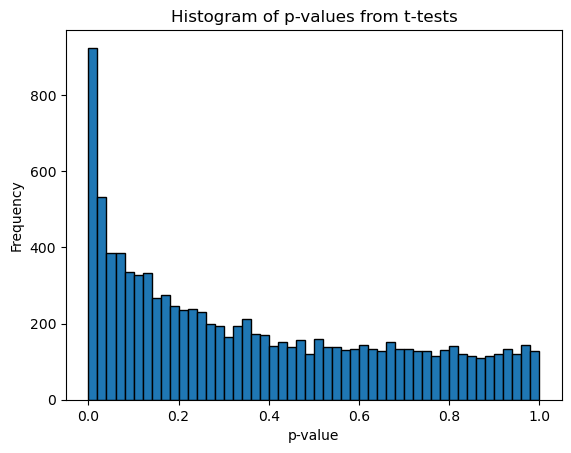

In [97]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Создаем список для хранения p-value
pvalues = []

# Запускаем цикл для генерации 10000 пар выборок и вычисления p-value
for _ in range(10000):
    # Генерируем первый набор данных с нормальным распределением, среднее значение 11, стандартное отклонение 10, размер выборки 100.
    data_fst = np.random.normal(11, 10, size=100)
    
    # Генерируем второй набор данных с нормальным распределением, среднее значение 10, стандартное отклонение 1, размер выборки 100.
    data_snd = np.random.normal(10, 1, size=100)
    
    # Применяем t-тест Стьюдента для независимых выборок и сохраняем p-value
    pvalues.append(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)

# Вычисляем и выводим долю случаев, когда p-value < 0.05
print((np.array(pvalues) < 0.05).mean())

# Строим гистограмму распределения p-value
plt.hist(pvalues, bins=50, edgecolor='k')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.title('Histogram of p-values from t-tests')

# Применяем форматирование оси Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.show()


### Что мы видим? 🤓

Гистограмма распределения p-value показывает, что t-тест Стьюдента часто находит значимые различия между выборками, когда их средние значения действительно различаются (в данном случае 11 и 10). Высокая частота значений p-value около 0 подтверждает это. В меньшем количестве случаев p-value распределены равномерно по диапазону от 0.5 до 1, указывая на ситуации, когда различия между выборками не были статистически значимыми.

А что будет, если мы ещё **сильнее увеличием различие** между выборками путём увеличения среднего с 11 до 12?

0.508


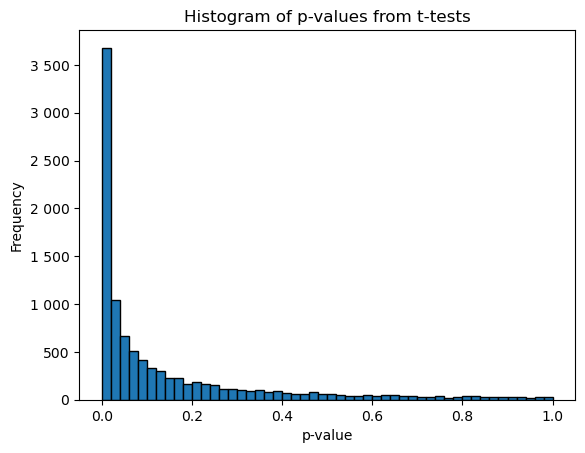

In [98]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Создаем список для хранения p-value
pvalues = []

# Запускаем цикл для генерации 10000 пар выборок и вычисления p-value
for _ in range(10000):
    # Генерируем первый набор данных с нормальным распределением, среднее значение 12, стандартное отклонение 10, размер выборки 100.
    data_fst = np.random.normal(12, 10, size=100)
    
    # Генерируем второй набор данных с нормальным распределением, среднее значение 10, стандартное отклонение 1, размер выборки 100.
    data_snd = np.random.normal(10, 1, size=100)
    
    # Применяем t-тест Стьюдента для независимых выборок и сохраняем p-value
    pvalues.append(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)

# Вычисляем и выводим долю случаев, когда p-value < 0.05
print((np.array(pvalues) < 0.05).mean())

# Строим гистограмму распределения p-value
plt.hist(pvalues, bins=50, edgecolor='k')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.title('Histogram of p-values from t-tests')

# Применяем форматирование оси Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.show()

### Что мы видим? 🤓

С увеличением разницы среднего мы замечаем явный сдвиг в сторону 0, объясняющийся тем, что t-тест Стьюдента часто находит значимые различия между выборками, когда их средние значения действительно различаются (в данном случае 12 и 10).

А если мы **сохраним условия среднего (11 и 10)**, но **увеличим размер выборок**? Как себя поведёт гистограмма?

0.8744


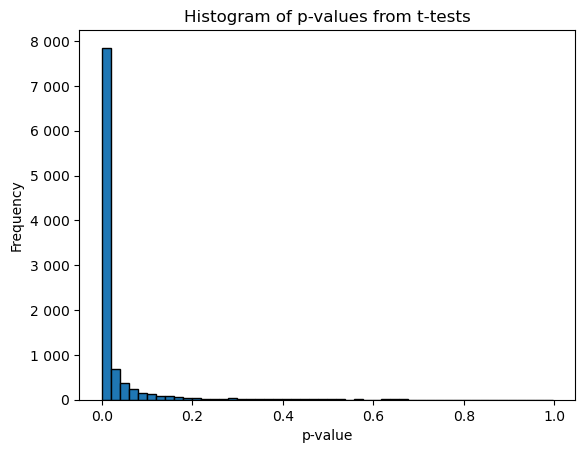

In [99]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Создаем список для хранения p-value
pvalues = []

# Запускаем цикл для генерации 10000 пар выборок и вычисления p-value
for _ in range(10000):
    # Генерируем первый набор данных с нормальным распределением, среднее значение 11, стандартное отклонение 10, размер выборки 1000.
    data_fst = np.random.normal(11, 10, size=1000)
    
    # Генерируем второй набор данных с нормальным распределением, среднее значение 10, стандартное отклонение 1, размер выборки 1000.
    data_snd = np.random.normal(10, 1, size=1000)
    
    # Применяем t-тест Стьюдента для независимых выборок и сохраняем p-value
    pvalues.append(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)

# Вычисляем и выводим долю случаев, когда p-value < 0.05
print((np.array(pvalues) < 0.05).mean())

# Строим гистограмму распределения p-value
plt.hist(pvalues, bins=50, edgecolor='k')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.title('Histogram of p-values from t-tests')

# Применяем форматирование оси Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.show()


### Что мы видим? 🤓

На гистограмме видно, что большая часть значений p-value сконцентрирована вблизи 0. Это указывает на то, что t-тест Стьюдента **почти всегда находит значимые различия между выборками**, когда их размер увеличивается до 1000 и средние значения отличаются (11 и 10).

Частота значений p-value **значительно уменьшается по мере увеличения значения p-value**, что подтверждает высокую мощность теста при больших выборках. Гистограмма показывает, что t-тест Стьюдента эффективно выявляет значимые различия при увеличении размера выборок.

In [80]:
hits = 0.
count = 0.

for _ in range(10000):
    data_fst = np.random.normal(11, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd).pvalue < 0.05:
        hits += 1

print(hits / count)

Доля случаев, когда p-value < 0.05: 0.00


In [ ]:
hits = 0.
count = 0.

for _ in range(10000):
    data_fst = np.random.normal(10, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd).pvalue < 0.05:
        hits += 1

print(hits / count)

сломалось(

In [ ]:
hits = 0.
count = 0.

for _ in range(10000):
    data_fst = np.random.normal(11, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd, equal_var=False).pvalue < 0.05:
        hits += 1

print(hits / count)

In [ ]:
hits = 0.
count = 0.

for _ in range(10000):
    data_fst = np.random.normal(10, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd, equal_var=False).pvalue < 0.05:
        hits += 1

print(hits / count)

Примерно как и ЦПТ, только не надо париться с формулами

Давайте другой тест возьмём, например, Мана-Уитни

In [ ]:
hits = 0.
count = 0.

for _ in range(10000):
    data_fst = np.random.normal(11, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    count += 1
    if scipy.stats.mannwhitneyu(data_fst, data_snd, alternative='two-sided').pvalue < 0.05:
        hits += 1

print(hits / count)

In [ ]:
hits = 0.
count = 0.

for _ in range(10000):
    data_fst = np.random.normal(10, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    count += 1
    if scipy.stats.mannwhitneyu(data_fst, data_snd, alternative='two-sided').pvalue < 0.05:
        hits += 1

print(hits / count)

In [ ]:
hits = 0.
count = 0.

for _ in range(10000):
    data_fst = np.random.normal(0, 10, size=1000)
    data_snd = np.random.normal(0, 1, size=100)

    count += 1
    if scipy.stats.mannwhitneyu(data_fst, data_snd, alternative='two-sided').pvalue < 0.05:
        hits += 1

print(hits / count)

Думаете всё сломалось? Нет, просто у этого критерия другая нулевая гипотеза!

In [ ]:
hits = 0.
count = 0.

for _ in range(10000):
    data_fst = np.random.normal(0, 1, size=1000)
    data_snd = np.random.normal(0, 1, size=100)

    count += 1
    if scipy.stats.mannwhitneyu(data_fst, data_snd, alternative='two-sided').pvalue < 0.05:
        hits += 1

print(hits / count)

In [ ]:
hits = 0.
count = 0.

for _ in range(10000):
    data_fst = np.random.normal(0, 1, size=1000)
    data_snd = np.random.normal(1, 1, size=100)

    count += 1
    if scipy.stats.mannwhitneyu(data_fst, data_snd, alternative='two-sided').pvalue < 0.05:
        hits += 1

print(hits / count)

# Перестановочные тесты

In [ ]:
def my_test(data_fst, data_snd, iters=1000, plot=True):
    data = np.array(list(data_fst) + list(data_snd))
    size = len(data)
    values = []
    fst_ratio = len(data_fst) * 1. / size
    for _ in range(iters):
        mask = (np.random.random(size=size) < fst_ratio)
        values.append(data[mask].mean() - data[~mask].mean())
        
    if plot:
        plt.hist(values, bins=30)
        plt.show()
        
    return (np.abs(values) > np.abs(data_fst.mean() - data_snd.mean())).mean()

### Корректно ли такое применение?

In [ ]:
data_fst = np.random.normal(0, 10, size=100)
data_snd = np.random.normal(0, 1, size=100)

print(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)
print(my_test(data_fst, data_snd, iters=10))
print(my_test(data_fst, data_snd, iters=100))
print(my_test(data_fst, data_snd, iters=1000))
print(my_test(data_fst, data_snd, iters=10000))

In [ ]:
data_fst = np.random.normal(0, 10, size=100)
data_snd = np.random.normal(1, 1, size=100)

print(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)
print(my_test(data_fst, data_snd, iters=10))
print(my_test(data_fst, data_snd, iters=100))
print(my_test(data_fst, data_snd, iters=1000))
print(my_test(data_fst, data_snd, iters=10000))

К сожалению нет :(

Давайте в этом убедимся :(

In [ ]:
hits = 0.
count = 0.

for _ in range(1000):
    data_fst = np.random.normal(11, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    count += 1
    if my_test(data_fst, data_snd, plot=False, iters=1000) < 0.05:
        hits += 1

print(hits / count)

In [ ]:
hits = 0.
count = 0.

for _ in range(1000):
    data_fst = np.random.normal(10, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    count += 1
    if my_test(data_fst, data_snd, plot=False, iters=1000) < 0.05:
        hits += 1

print(hits / count)

Как с Мана-Уитни, нулевая гипотеза это что распределения совпадают

In [ ]:
hits = 0.
count = 0.

for _ in range(1000):
    data_fst = np.random.normal(11, 1, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    count += 1
    if my_test(data_fst, data_snd, plot=False, iters=1000) < 0.05:
        hits += 1

print(hits / count)

In [ ]:
hits = 0.
count = 0.

for _ in range(1000):
    data_fst = np.random.normal(10, 1, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    count += 1
    if my_test(data_fst, data_snd, plot=False, iters=1000) < 0.05:
        hits += 1

print(hits / count)

Вот это уже неплохо

# Bootstrap

In [ ]:
def my_bootstrap(data_fst, data_snd, iters=1000, plot=True):
    values = []
    for _ in range(iters):
        values.append(
            np.random.choice(data_fst, replace=True, size=len(data_fst)).mean()
            -
            np.random.choice(data_snd, replace=True, size=len(data_snd)).mean()
        )
        
    if plot:
        plt.hist(values, bins=30)
        plt.show()
        
    return np.percentile(values, [2.5, 97.5])

In [ ]:
data_fst = np.random.normal(0, 10, size=1000)
data_snd = np.random.normal(0, 1, size=100)

print(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)
print(my_bootstrap(data_fst, data_snd, iters=1000, plot=True))

In [ ]:
data_fst = np.random.normal(1, 10, size=1000)
data_snd = np.random.normal(0, 1, size=100)

print(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)
print(my_bootstrap(data_fst, data_snd, iters=1000, plot=True))

In [ ]:
hits = 0.
count = 0.

for _ in range(1000):
    data_fst = np.random.normal(11, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    lower, upper = my_bootstrap(data_fst, data_snd, plot=False, iters=1000)
    count += 1
    if not (lower < 0 < upper):
        hits += 1

print(hits / count)

In [ ]:
hits = 0.
count = 0.

for _ in range(1000):
    data_fst = np.random.normal(10, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    lower, upper = my_bootstrap(data_fst, data_snd, plot=False, iters=1000)
    count += 1
    if not (lower < 0 < upper):
        hits += 1

print(hits / count)

# Бакетное сэмплирование

In [ ]:
hits = 0.
count = 0.

for _ in range(10000):
    data_fst = np.random.normal(10, 5, size=10000)
    data_snd = np.random.normal(10, 1, size=10000)
    
    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd, equal_var=False).pvalue < 0.05:
        hits += 1

print(hits / count)

In [ ]:
hits = 0.
count = 0.

for _ in range(10000):
    data_fst = np.random.normal(10.1, 5, size=10000)
    data_snd = np.random.normal(10, 1, size=10000)
    
    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd, equal_var=False).pvalue < 0.05:
        hits += 1

print(hits / count)

делаем бакеты

In [ ]:
hits = 0.
count = 0.

for _ in range(10000):
    data_fst = np.random.normal(10, 5, size=10000).reshape((100, 100)).mean(axis=1)
    data_snd = np.random.normal(10, 1, size=10000).reshape((100, 100)).mean(axis=1)
    
    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd, equal_var=False).pvalue < 0.05:
        hits += 1

print(hits / count)

In [ ]:
hits = 0.
count = 0.

for _ in range(10000):
    data_fst = np.random.normal(10.1, 5, size=10000).reshape((100, 100)).mean(axis=1)
    data_snd = np.random.normal(10, 1, size=10000).reshape((100, 100)).mean(axis=1)
    
    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd, equal_var=False).pvalue < 0.05:
        hits += 1

print(hits / count)

Можно и суммы

In [ ]:
hits = 0.
count = 0.

for _ in range(10000):
    data_fst = np.random.normal(10, 5, size=10000).reshape((100, 100)).sum(axis=1)
    data_snd = np.random.normal(10, 1, size=10000).reshape((100, 100)).sum(axis=1)
    
    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd, equal_var=False).pvalue < 0.05:
        hits += 1

print(hits / count)

In [ ]:
hits = 0.
count = 0.

for _ in range(10000):
    data_fst = np.random.normal(10.1, 5, size=10000).reshape((100, 100)).sum(axis=1)
    data_snd = np.random.normal(10, 1, size=10000).reshape((100, 100)).sum(axis=1)
    
    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd, equal_var=False).pvalue < 0.05:
        hits += 1

print(hits / count)

А теперь усложним выборку

In [ ]:
hits = 0.
count = 0.

for _ in range(10000):
    params_fst = np.random.uniform(-5, 5, size=1000)
    params_snd = np.random.uniform(-5, 5, size=1000)
    
    data_fst = np.random.normal(10, 5, size=10000).reshape((1000, 10)) + params_fst[:, np.newaxis]
    data_fst = data_fst.reshape((10000,))
    data_snd = np.random.normal(10, 1, size=10000).reshape((1000, 10)) + params_snd[:, np.newaxis]
    data_snd = data_snd.reshape((10000,))
    
    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd, equal_var=False).pvalue < 0.05:
        hits += 1

print(hits / count)

In [ ]:
hits = 0.
count = 0.

for _ in range(10000):
    params_fst = np.random.uniform(-1, 1, size=1000)
    params_snd = np.random.uniform(-1, 1, size=1000)
    
    data_fst = np.random.normal(10.1, 5, size=10000).reshape((1000, 10)) + params_fst[:, np.newaxis]
    data_fst = data_fst.reshape((10000,))
    data_snd = np.random.normal(10, 1, size=10000).reshape((1000, 10)) + params_snd[:, np.newaxis]
    data_snd = data_snd.reshape((10000,))
    
    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd, equal_var=False).pvalue < 0.05:
        hits += 1

print(hits / count)

беда(

In [ ]:
hits = 0.
count = 0.

for _ in range(10000):
    params_fst = np.random.uniform(-5, 5, size=1000)
    params_snd = np.random.uniform(-5, 5, size=1000)
    
    data_fst = np.random.normal(10, 5, size=10000).reshape((1000, 10)) + params_fst[:, np.newaxis]
    data_fst = data_fst.reshape((10000,)).reshape((100, 100)).mean(axis=1)
    data_snd = np.random.normal(10, 1, size=10000).reshape((1000, 10)) + params_snd[:, np.newaxis]
    data_snd = data_snd.reshape((10000,)).reshape((100, 100)).mean(axis=1)
    
    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd, equal_var=False).pvalue < 0.05:
        hits += 1

print(hits / count)

In [ ]:
hits = 0.
count = 0.

for _ in range(10000):
    params_fst = np.random.uniform(-5, 5, size=1000)
    params_snd = np.random.uniform(-5, 5, size=1000)
    
    data_fst = np.random.normal(10.1, 5, size=10000).reshape((1000, 10)) + params_fst[:, np.newaxis]
    data_fst = data_fst.reshape((10000,)).reshape((100, 100)).mean(axis=1)
    data_snd = np.random.normal(10, 1, size=10000).reshape((1000, 10)) + params_snd[:, np.newaxis]
    data_snd = data_snd.reshape((10000,)).reshape((100, 100)).mean(axis=1)
    
    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd, equal_var=False).pvalue < 0.05:
        hits += 1

print(hits / count)

In [ ]:
hits = 0.
count = 0.

for _ in range(10000):
    params_fst = np.random.uniform(-1, 1, size=1000)
    params_snd = np.random.uniform(-1, 1, size=1000)
    
    data_fst = np.random.normal(10.1, 5, size=10000).reshape((1000, 10)) + params_fst[:, np.newaxis]
    data_fst = data_fst.reshape((10000,)).reshape((100, 100)).mean(axis=1)
    data_snd = np.random.normal(10, 1, size=10000).reshape((1000, 10)) + params_snd[:, np.newaxis]
    data_snd = data_snd.reshape((10000,)).reshape((100, 100)).mean(axis=1)
    
    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd, equal_var=False).pvalue < 0.05:
        hits += 1

print(hits / count)

In [ ]:
hits = 0.
count = 0.

for _ in range(10000):
    params_fst = np.random.uniform(-10, 10, size=1000)
    params_snd = np.random.uniform(-10, 10, size=1000)
    
    data_fst = np.random.normal(11, 5, size=10000).reshape((1000, 10)) + params_fst[:, np.newaxis]
    data_fst = data_fst.reshape((10000,)).reshape((100, 100)).mean(axis=1)
    data_snd = np.random.normal(10, 1, size=10000).reshape((1000, 10)) + params_snd[:, np.newaxis]
    data_snd = data_snd.reshape((10000,)).reshape((100, 100)).mean(axis=1)
    
    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd, equal_var=False).pvalue < 0.05:
        hits += 1

print(hits / count)